In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn import metrics
from sklearn.model_selection import train_test_split # to split the data
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load train dataset
df_train = pd.read_csv("D:/BigMartPrediction/train_v9rqX0R.csv")

In [3]:
# making copies of train and test dataset
df = df_train.copy()

In [4]:
# first 5 rows of the dataframe
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#Shape of train
df.shape

(8523, 12)

In [6]:
#check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#checking missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#Lets describe train
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
# filling the missing values in "Item_weight column" with "Mean" value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [10]:
# mode of "Outlet_Size" column
df['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [11]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [12]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [13]:
miss_values = df['Outlet_Size'].isnull()   

In [14]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [15]:
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [16]:
# checking for missing values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
#Identify categorical columns 
df_cat=df.select_dtypes(include='object')
df_cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

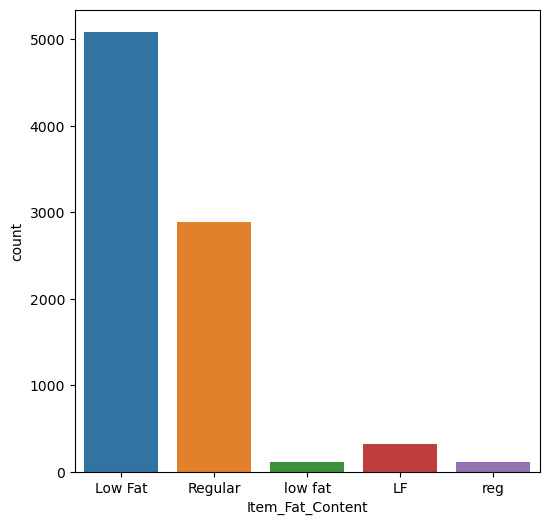

In [18]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

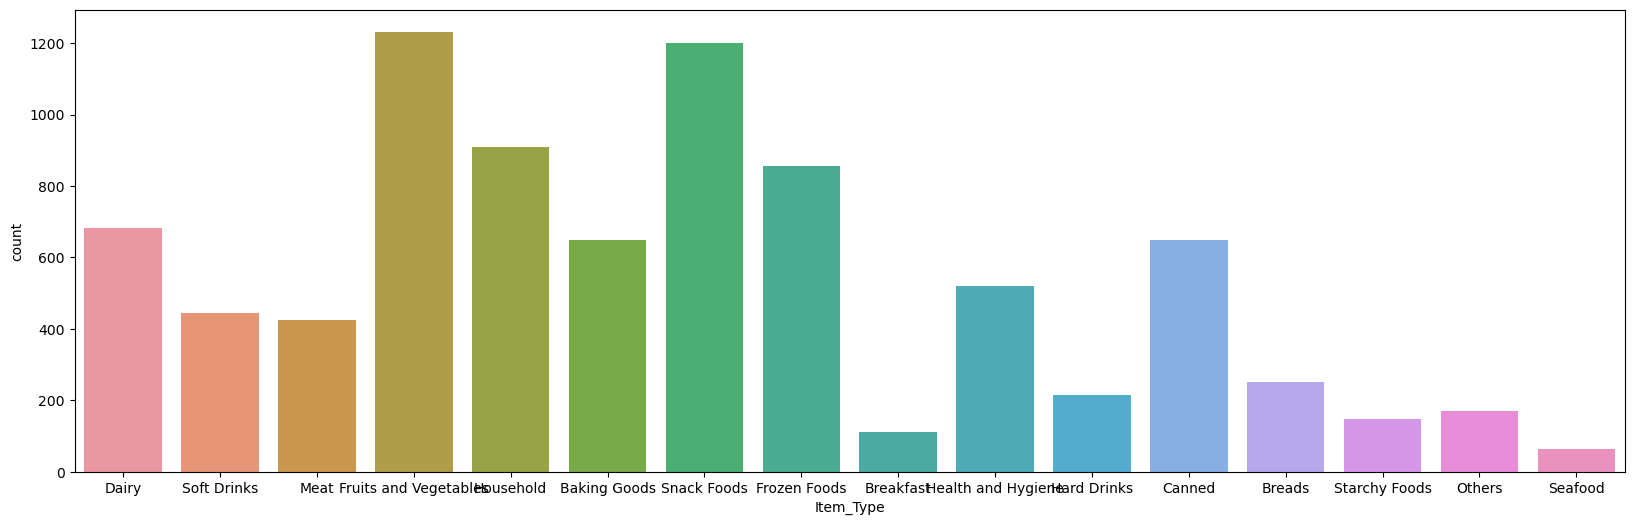

In [19]:
# Item_Type column
plt.figure(figsize=(20,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

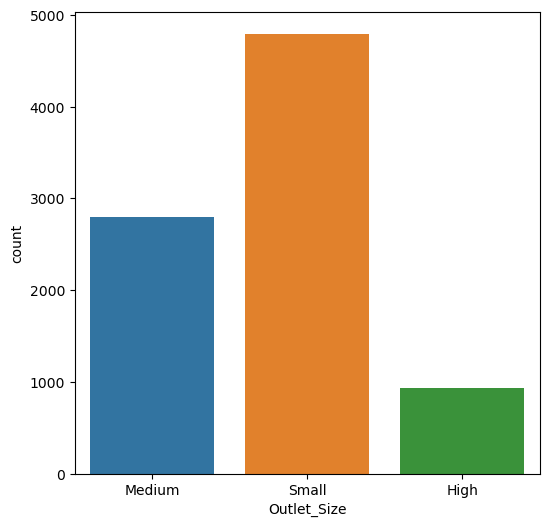

In [20]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

In [21]:
#Identify numerical columns
df_num=df.select_dtypes(include=['int64','float64'])
list(df_num.columns)

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

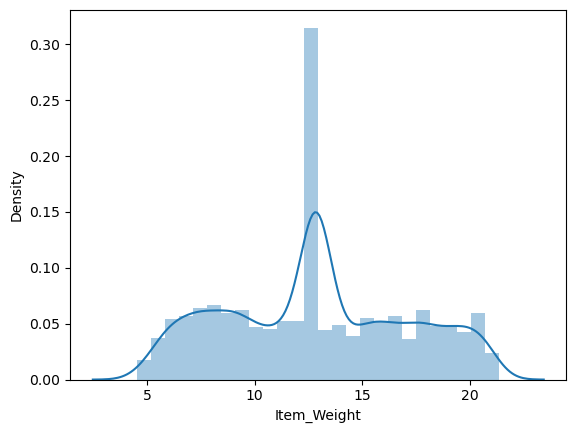

In [22]:
# Item_Weight distribution
sns.distplot( a=df["Item_Weight"], hist=True);

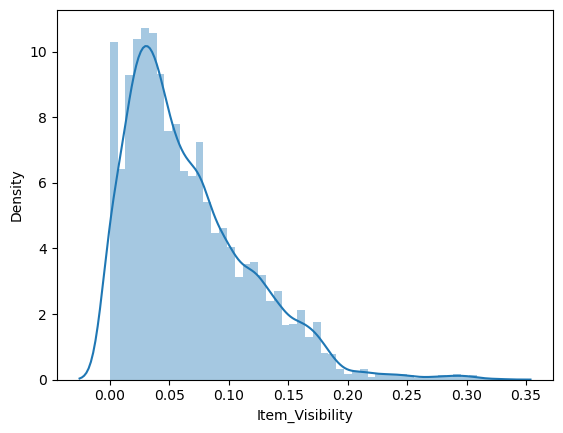

In [23]:
# Item_Visibility distribution
sns.distplot( a=df["Item_Visibility"], hist=True);

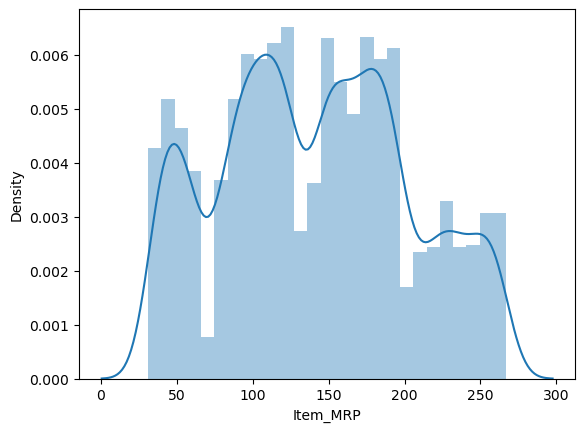

In [24]:
# Item_MRP distribution
sns.distplot( a=df["Item_MRP"], hist=True);

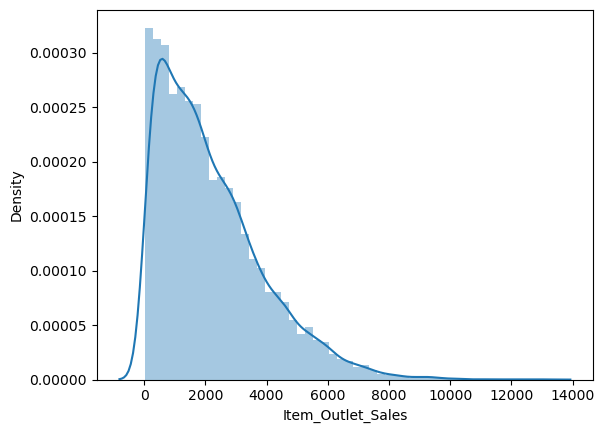

In [25]:
# Item_Outlet_Sales distribution
sns.distplot( a=df["Item_Outlet_Sales"], hist=True);

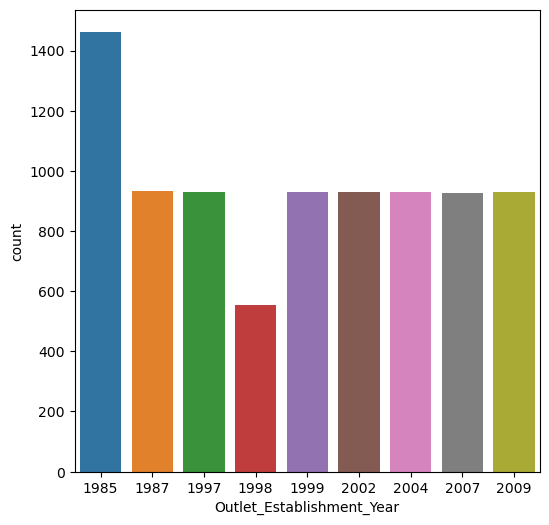

In [26]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

In [27]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [29]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [30]:
#Label Encoding
encoder = LabelEncoder()

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [31]:
df.Item_Identifier.nunique()
df['Item_Identifier'].value_counts().sample(10)

FDT12    7
DRE48    7
FDA15    8
FDA44    8
NCB30    7
FDZ33    8
FDU20    7
FDU01    4
NCJ19    5
FDK15    6
Name: Item_Identifier, dtype: int64

In [32]:
#Drop non-imp columns
df.drop('Item_Identifier', axis = 1, inplace = True)


In [33]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [34]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 10) (6818, 10) (1705, 10)


In [37]:
lr = LinearRegression()
model1 = lr.fit(X_train, Y_train)
predictions1 = model1.predict(X_test)
print('Mean Squared Error is: ', mean_squared_error(Y_test, predictions1))
print ('R Squared Value is: ', r2_score(Y_test,predictions1))

Mean Squared Error is:  1577087.2514614917
R Squared Value is:  0.48913213984900805


In [110]:
df_test = pd.read_csv("D:/BigMartPrediction/test_AbJTz2l.csv")

In [111]:
# making copies of test dataset
test = df_test.copy()

In [112]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [113]:
test.shape

(5681, 11)

In [114]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [115]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [116]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [117]:
# filling the missing values in "Item_weight column" with "Mean" value
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace=True)

In [118]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [119]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [120]:
miss_values = test['Outlet_Size'].isnull()   

In [121]:
print(miss_values)

0       False
1        True
2        True
3        True
4       False
        ...  
5676    False
5677    False
5678     True
5679     True
5680     True
Name: Outlet_Size, Length: 5681, dtype: bool


In [122]:
test.loc[miss_values, 'Outlet_Size'] = test.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [123]:
# checking for missing values
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

test = test.drop('Item_Identifier', axis = 1, inplace =True)

In [124]:
#Identify categorical columns 
test_cat=test.select_dtypes(include='object')
test_cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

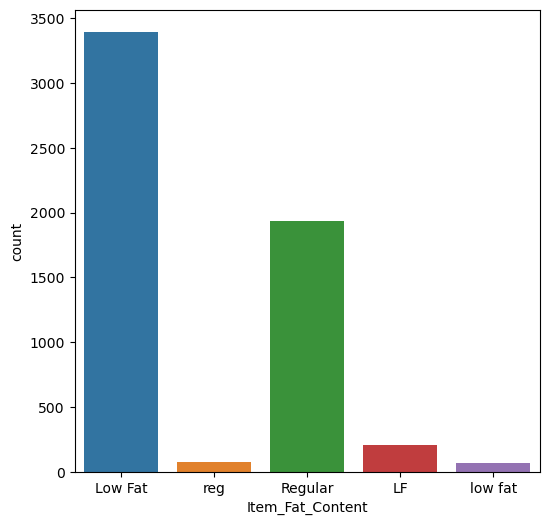

In [125]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=test)
plt.show()

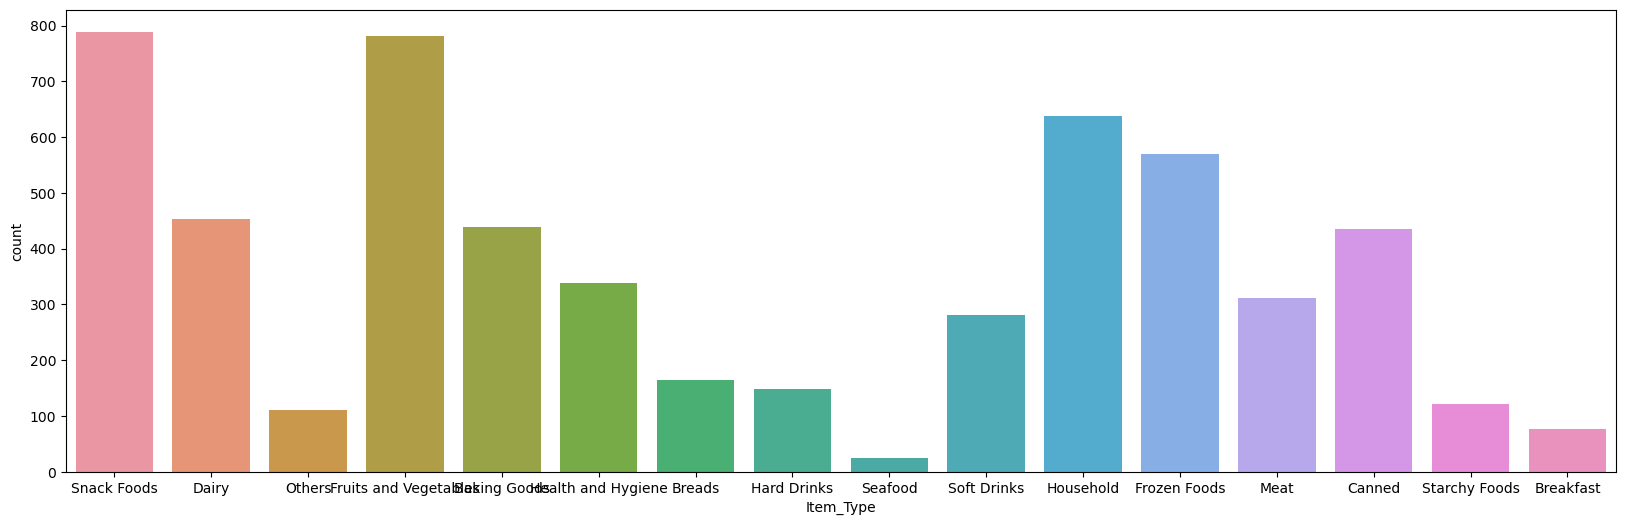

In [126]:
# Item_Type column
plt.figure(figsize=(20,6))
sns.countplot(x='Item_Type', data=test)
plt.show()

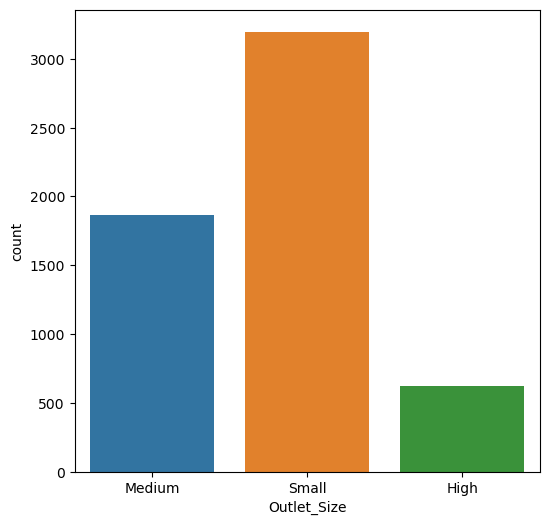

In [127]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=test)
plt.show()

In [128]:
#Identify numerical columns
test_num=test.select_dtypes(include=['int64','float64'])
list(test_num.columns)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

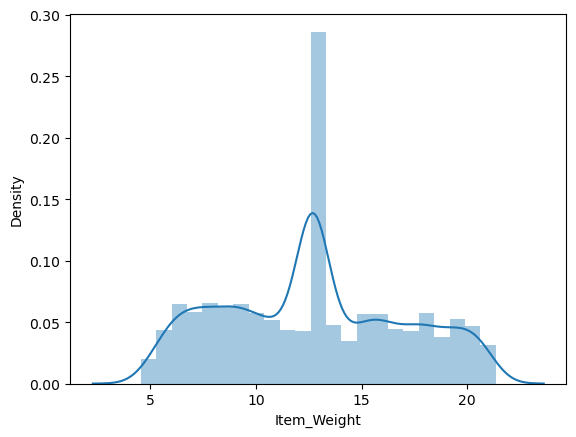

In [129]:
# Item_Weight distribution
sns.distplot( a=test["Item_Weight"], hist=True);

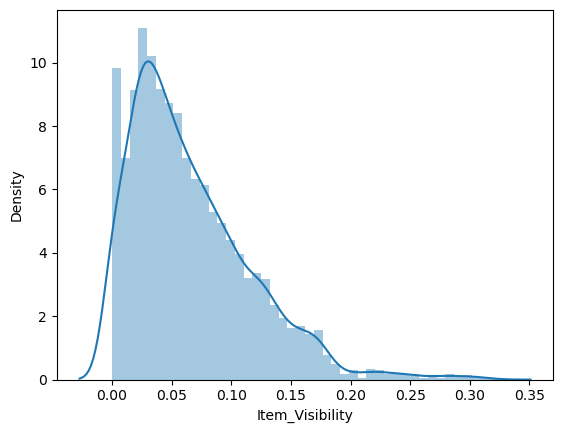

In [130]:
# Item_Visibility distribution
sns.distplot( a=test["Item_Visibility"], hist=True);

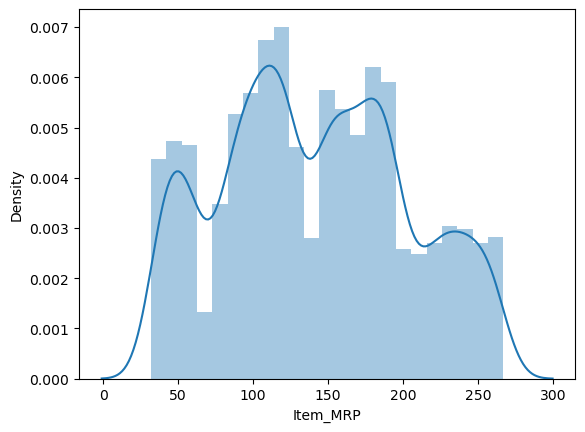

In [131]:
# Item_MRP distribution
sns.distplot( a=test["Item_MRP"], hist=True);

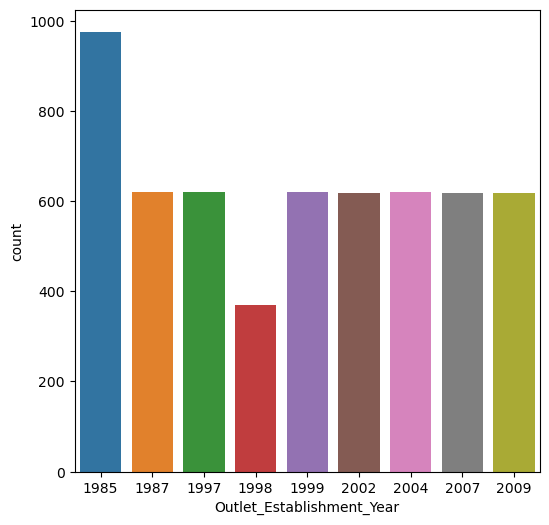

In [132]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=test)
plt.show()

In [133]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [134]:
test.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [135]:
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [136]:
# making copies of test dataset
test1 = test.copy()

In [137]:
#Label Encoding
encoder = LabelEncoder()

test1['Item_Fat_Content'] = encoder.fit_transform(test1['Item_Fat_Content'])

test1['Item_Type'] = encoder.fit_transform(test1['Item_Type'])

test1['Outlet_Identifier'] = encoder.fit_transform(test1['Outlet_Identifier'])

test1['Outlet_Size'] = encoder.fit_transform(test1['Outlet_Size'])

test1['Outlet_Location_Type'] = encoder.fit_transform(test1['Outlet_Location_Type'])

test1['Outlet_Type'] = encoder.fit_transform(test1['Outlet_Type'])

In [138]:
test1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,FDW14,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,NCN55,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,FDQ58,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,FDY38,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


In [139]:
test1 = test1.drop(columns='Item_Identifier', axis=1)

In [141]:
item_outsale_pred = lr.predict(test1)

In [142]:
item_outsale_pred

array([1943.49122531, 1067.98229705, 2261.95297769, ..., 1717.13115362,
       3084.75553317, 1098.17200415])

In [143]:
#ADDING THE PREDICTED ITEM_OUTLET_SALE COLUMNS TO TEST DATA
test["item_outlet_sale"] = item_outsale_pred

In [144]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,item_outlet_sale
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1943.491225
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1,1067.982297
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store,2261.952978
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1,2130.856996
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,5012.329922
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2348.702188
5677,FDD47,7.600000,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,3097.350997
5678,NCO17,10.000000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,1717.131154
5679,FDJ26,15.300000,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,3084.755533


In [145]:
#creating dataframe for the required output for submission file

submission = pd.DataFrame()
submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']

#PRepare submission file
submission['Item_Outlet_Sales'] = item_outsale_pred
submission.to_csv(r"D:\BigMartPrediction\submission1.csv",index=False)
submission.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1943.491225
1,FDW14,OUT017,1067.982297
2,NCN55,OUT010,2261.952978
3,FDQ58,OUT017,2130.856996
4,FDY38,OUT027,5012.329922
